In [24]:
import pandas as pd
import re
import string
from pprint import pprint
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline 

import nltk
import wordninja as wn
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
# This creates a client that uses the default port on localhost.
# If connecting to AWS, you need a connection string.
# Can do the same thing with MongoClient("mongodb://localhost:27017")
client = MongoClient()

In [26]:
# Makes it look similar to shell mongo
db = client.wheel_of_time

In [27]:
def book_to_df(collection):
    cursor = collection.find({},{'_id':0})
    
    for document in cursor:
        doc_book = document
    key_book = list(doc_book.keys())[0] 
    chapters = doc_book[key_book]

    dictlist = []
    chap_dict = {}
    for i, (key, value) in enumerate(chapters.items()):
        #dictlist.append(value)
        chap_dict[i] = value 
    #print(chap_dict)
    df = pd.DataFrame.from_dict(chap_dict, orient='index')
    df['Chapter_Number'] = chap_dict.keys()
    df['Book_Title'] = key_book
    return df

In [28]:
books = 14
books_df = pd.DataFrame(columns=['Book_Title','Chapter_Text','Chapter_Number'])
for i in range(books):
    collection = db['book{}'.format(i+1)]
    result = book_to_df(collection)
    result = result.rename(columns={0:'Chapter_Text'})
    books_df = pd.concat([books_df, result], ignore_index=True)

In [29]:
book_to_df(collection)

,0,Chapter_Number,Book_Title
0,Bayrd pressed the coin between his thumb and f...,0,14 A Memory of Light
1,"A Knack81114161922In the end, the solution had...",1,14 A Memory of Light
2,1\nEastward the Wind BlewThe Wheel of Time tur...,2,14 A Memory of Light
3,2\nThe Choke of an AjahPevara did her very bes...,3,14 A Memory of Light
4,3\nA Dangerous Place“ V ord Logain and Taim ha...,4,14 A Memory of Light
5,4\nAdvantages to a Bondnd that was the end of ...,5,14 A Memory of Light
6,5\nTo Require a BoonRand al’Thor awoke and dre...,6,14 A Memory of Light
7,6Much of it was directed at the woman standing...,7,14 A Memory of Light
8,7\nInto the Thick of ItElayne stepped out of t...,8,14 A Memory of Light
9,"8\nThat Smoldering CityAtop Moonshadow, her de...",9,14 A Memory of Light


In [30]:
books_df

,Book_Title,Chapter_Text,Chapter_Number
0,01 The Eye of the World,PROLOGUE\nDragonmountThe palace still shook oc...,0
1,01 The Eye of the World,"1\nAn Empty RoadThe Wheel of Time turns, and A...",1
2,01 The Eye of the World,2\nStrangersWhen Rand and Mat carried the firs...,2
3,01 The Eye of the World,3\nThe PeddlerClusters of pots clattered and b...,3
4,01 The Eye of the World,4\nThe GleemanThe door of the inn banged shut ...,4
...,...,...,...
668,14 A Memory of Light,"45\nTendrils of MistDice tumbling in his head,...",46
669,14 A Memory of Light,46\nTo AwakenRand broke free from the darkness...,47
670,14 A Memory of Light,"47She fought it off, but barely. The Forsaken ...",48
671,14 A Memory of Light,48So many dead. Hundreds of thousands of men a...,49


In [31]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[0-9]', ' ', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [32]:

# Let's take a look at the updated text
books_df['Chapter_Text'] = pd.DataFrame(books_df.Chapter_Text.apply(round1))
chap_df = books_df.copy()

In [33]:
books_df.Chapter_Text[0]

'prologue dragonmountthe palace still shook occasionally as the earth rumbled in memory, groaned as if it woulddeny what had happened. bars of sunlight cast through rents in the walls made motes of dust         glitterwhere they yet hung in the air. scorch-marks marred the walls, the floors, the ceilings. broad         blacksmears crossed the blistered paints and gilt of once-bright murals, soot overlaying crumbling         friezesof men and animals which seemed to have attempted to walk before the madness grew quiet. the       dead lay everywhere, men and women and children, struck down in attempted flight by the         lightningsthat had flashed down every corridor, or seized by the fires that had stalked them, or sunken         into stoneof the palace, the stones that had flowed and sought, almost alive, before stillness came         again. in oddcounterpoint, colorful tapestries and paintings, masterworks all, hung undisturbed except         wherebulging walls had pushed them awry

In [34]:
books_df['Chapter_Text'] = books_df['Chapter_Text'].apply(lambda x: nltk.tokenize.sent_tokenize(x))

In [35]:
books_df = books_df.set_index(['Book_Title','Chapter_Number']).Chapter_Text.apply(pd.Series).stack().reset_index(level=-1, drop=True).astype(str).reset_index()

In [36]:
books_df  = books_df.rename(columns={0:"Chapter_by_Sentence"})
sentences_df = books_df.copy()

In [37]:
sentences_df.to_csv('books_by_sentence.csv')
sentences_df

,Book_Title,Chapter_Number,Chapter_by_Sentence
0,01 The Eye of the World,0,prologue dragonmountthe palace still shook occ...
1,01 The Eye of the World,0,bars of sunlight cast through rents in the wal...
2,01 The Eye of the World,0,"scorch-marks marred the walls, the floors, the..."
3,01 The Eye of the World,0,broad blacksmears crossed the blistere...
4,01 The Eye of the World,0,"the dead lay everywhere, men and women a..."
...,...,...,...
320290,14 A Memory of Light,50,"author unknown, the fourth age."
320291,14 A Memory of Light,50,"he came like the wind, like the wind touched e..."
320292,14 A Memory of Light,50,—from the dragon reborn.
320293,14 A Memory of Light,50,"by loial, son of arent son of halan, the fourt..."


In [58]:




sentences_df['Sentence_Length'] = sentences_df['Chapter_by_Sentence'].apply(lambda x: len((" ".join(x.split()).split())))

In [59]:
sentences_df.to_csv('books_by_sentence.csv')


In [60]:
sentences_df

,Book_Title,Chapter_Number,Chapter_by_Sentence,Sentence_Length
0,01 The Eye of the World,0,prologue dragonmountthe palace still shook occ...,20
1,01 The Eye of the World,0,bars of sunlight cast through rents in the wal...,20
2,01 The Eye of the World,0,"scorch-marks marred the walls, the floors, the...",8
3,01 The Eye of the World,0,broad blacksmears crossed the blistere...,30
4,01 The Eye of the World,0,"the dead lay everywhere, men and women a...",50
...,...,...,...,...
320290,14 A Memory of Light,50,"author unknown, the fourth age.",5
320291,14 A Memory of Light,50,"he came like the wind, like the wind touched e...",16
320292,14 A Memory of Light,50,—from the dragon reborn.,4
320293,14 A Memory of Light,50,"by loial, son of arent son of halan, the fourt...",11


In [61]:
mean_sent = sentences_df.groupby(['Book_Title','Chapter_Number']).Sentence_Length.mean()
mean_sent

Book_Title               Chapter_Number
01 The Eye of the World  0                 13.123711
                         1                 15.086393
                         2                 13.728045
                         3                 14.082873
                         4                 14.175610
                                             ...    
14 A Memory of Light     46                 9.325879
                         47                 9.432432
                         48                 8.315508
                         49                 8.285714
                         50                 8.551020
Name: Sentence_Length, Length: 673, dtype: float64

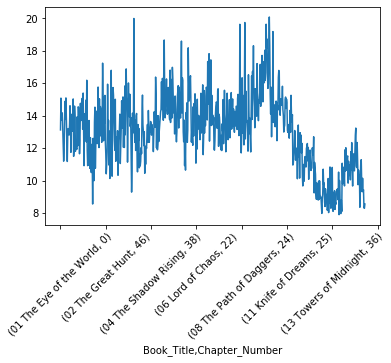

In [62]:
mean_sent.plot(rot=45)
plt.savefig('ave_sent_len.pdf')

In [48]:
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize

my_text = sentences_df['Chapter_by_Sentence'][0]
tokens = pos_tag(word_tokenize(my_text))
entities = ne_chunk(tokens)



[('prologue', 'NN'), ('dragonmountthe', 'NN'), ('palace', 'NN'), ('still', 'RB'), ('shook', 'VBD'), ('occasionally', 'RB'), ('as', 'IN'), ('the', 'DT'), ('earth', 'NN'), ('rumbled', 'VBD'), ('in', 'IN'), ('memory', 'NN'), (',', ','), ('groaned', 'VBN'), ('as', 'IN'), ('if', 'IN'), ('it', 'PRP'), ('woulddeny', 'VBD'), ('what', 'WP'), ('had', 'VBD'), ('happened', 'VBN'), ('.', '.')]
(S
  prologue/NN
  dragonmountthe/NN
  palace/NN
  still/RB
  shook/VBD
  occasionally/RB
  as/IN
  the/DT
  earth/NN
  rumbled/VBD
  in/IN
  memory/NN
  ,/,
  groaned/VBN
  as/IN
  if/IN
  it/PRP
  woulddeny/VBD
  what/WP
  had/VBD
  happened/VBN
  ./.)


In [ ]:
sentences_df['sent_structure']

In [54]:
import gensim
google_vec_file = '/Users/markdziuban/Downloads/GoogleNews-vectors-negative300.bin'
model = gensim.models.Word2Vec(google_vec_file, size=10, window=2,min_count=1, sg=1)

In [57]:
model['Metis']

/Users/markdziuban/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'Metis' not in vocabulary"

In [64]:
count_sent = sentences_df.groupby(['Book_Title','Chapter_Number'])['Sentence_Length'].count()

In [65]:
count_sent

Book_Title               Chapter_Number
01 The Eye of the World  0                 194
                         1                 463
                         2                 353
                         3                 362
                         4                 410
                                          ... 
14 A Memory of Light     46                313
                         47                296
                         48                187
                         49                 98
                         50                931
Name: Sentence_Length, Length: 673, dtype: int64

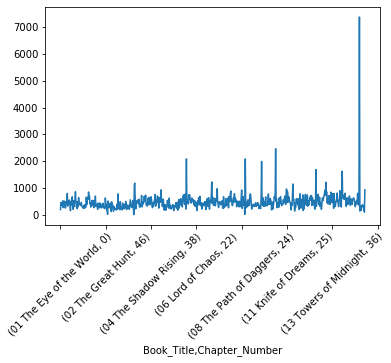

In [66]:
count_sent.plot(rot=45)
plt.savefig('sent_per_chap.pdf')

In [49]:


#corpus = books_df[['Chapter_Text']].copy()
#corpus

In [50]:
#pickle.dump(corpus, open("clean_data.pkl", "wb"))

In [14]:
import pickle

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(chap_df.Chapter_Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = books_df.index
data = data_dtm.transpose()
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_dtm.to_pickle("data_dtm.pkl")

In [ ]:
# Word count Per Book

books_df['words_by_chapter']= books_df['Chapter_Text'].apply(lambda x: len(x.split()))

In [ ]:
books_df.to_csv('books_df.csv')
books_df.to_pickle("corpus1.pkl")

In [ ]:
word_count_book = books_df.groupby('Book_Title').sum()

In [ ]:
word_count_book.to_csv('word_count_wot.csv')

In [ ]:
word_count_book.plot();

In [ ]:
# Word count per chapter

word_count_chapter = books_df.groupby(['Book_Title', 'Chapter_Number']).sum()

In [ ]:
word_count_chapter

In [ ]:
word_count_chapter.plot(kind='barh', figsize=[12,12]);

In [ ]:
num_of_chapters = books_df.groupby(['Book_Title'])['Chapter_Number'].count()

In [ ]:
num_of_chapters.plot(kind='barh', figsize=[12,12])

In [19]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf1.fit_transform(books_df.Chapter_Text).toarray()
dt_tfidf = pd.DataFrame(X_tfidf, columns = tfidf1.get_feature_names())
dt_tfidf
#tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')


,__,__that,__to,__toaccomplish,aaaaaaaaaaaaaaaaah,aaaaaaah,aaaaah,aaaah,aaagh,aaah,...,zipped,zipping,zither,zithers,zomara,zomaran,zone,zorelle,zty,zushi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

In [ ]:
#corpus = list(books_df.Chapter_Text)
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm.transpose()))

In [44]:
from itertools import combinations

pairs = list(combinations(enumerate(data),2))
combos = [(a[0],b[0]) for a,b in pairs]
phrases = [(a[1], b[1]) for a,b in pairs]

In [45]:


#corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

In [46]:
# calculate the cosine similarity for all pairs of phrases and sort by most similar
results_tfidf = [cosine_similarity(dt_tfidf.iloc[a], dt_tfidf.iloc[b])for a, b in combos]
sorted(zip(results_tfidf, phrases), reverse=True)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.